# 2. Análisis de la variabilidad de un catálogo en función de la ventana de observación

#### - Explora la variabilidad de las distribuciones magnitud frecuencia y recurrencias en función de la ventana temporal que se aplique

In [8]:
#Import the necessary libraries

%matplotlib widget
import ipympl
import os
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter

### Define la ventana temporal a explorar (en años)

#### - Prueba con valores de entre 100 y 20000 años

In [12]:
#Time window parameters

time_window = 1000
time_step=time_window

### Selecciona la carpeta correspondiente a cada uno de los modelos dentro de la carpeta "Catalogues"

In [13]:
# Extract the catalogue

cat = "Sistema_EBSZ" #Pon aquí el nombre de la carpeta del catálogo correspondiente

path = os.getcwd()
path = os.path.abspath(os.path.join(path, "../"+ "/Catalogues/"))
path = path+"/"+cat

file = os.path.join(path, "data.json")
with open(file, "r") as file:
    catalog = json.load(file)

Ev_per_patch = {key: catalog[key] for key in catalog.keys() & {"eList", "pList", "dList", "tList", "dtauList", "M", "M0", "area", "x", "y", "z"}}

# Filter events by year number

cut_year = 20000
t0_ini = list(catalog.values())[-2]
z_ini = Ev_per_patch.get("z")
loc_cut = np.where(np.array(t0_ini)>cut_year)[0][0]
M_ini = np.array(Ev_per_patch.get("M"))[loc_cut:]
M_ini = [float(i) for i in M_ini]
M0_ini = np.array(Ev_per_patch.get("M0"))[loc_cut:]
M0_ini = [float(i) for i in M0_ini]
area_ini = np.array(Ev_per_patch.get("area"))[loc_cut:]
num_events_ini = list(range(1, len(M_ini)+1))+loc_cut
x_ini = np.array(Ev_per_patch.get("x"))[loc_cut:]
y_ini = np.array(Ev_per_patch.get("y"))[loc_cut:]
z_ini = np.array(Ev_per_patch.get("z"))[loc_cut:]
Depth_ini = np.array(Ev_per_patch.get("z"))[loc_cut:]
t0_ini = np.array(t0_ini)[loc_cut:]

eList_ini = Ev_per_patch.get("eList")
loc_list_cut = np.where(np.array(eList_ini)==num_events_ini[0])[0][0]
eList_ini = np.array(eList_ini)[loc_list_cut:]
pList_ini = np.array(Ev_per_patch.get("pList"))[loc_list_cut:]
dList_ini = np.array(Ev_per_patch.get("dList"))[loc_list_cut:]
dtauList_ini = np.array(Ev_per_patch.get("dtauList"))[loc_list_cut:]
tList_ini = np.array(Ev_per_patch.get("tList"))[loc_list_cut:]

# Completness

mag_range = np.arange(0, 8, 0.1)
hist1, bins1 = np.histogram(M_ini, bins=mag_range)
Mc = bins1[np.argmax(hist1)]
Mc_2 = Mc

idx_Mc = [x > Mc_2 for x in M_ini]
M_ini = (np.array(M_ini))[idx_Mc]
M0_ini = (np.array(M0_ini))[idx_Mc]
area_ini = (np.array(area_ini))[idx_Mc]
num_events_ini = (np.array(num_events_ini))[idx_Mc]
t0_ini = (np.array(t0_ini))[idx_Mc]
x_ini = (np.array(x_ini))[idx_Mc]
y_ini = (np.array(y_ini))[idx_Mc]
z_ini= (np.array(z_ini))[idx_Mc]

idx_Mc_all = np.where(np.isin(eList_ini, num_events_ini))[0]
eList_ini = np.float64((np.array(eList_ini))[idx_Mc_all])
pList_ini = np.float64((np.array(pList_ini))[idx_Mc_all])
dList_ini = np.float64((np.array(dList_ini))[idx_Mc_all])
dtauList_ini = np.float64((np.array(dtauList_ini))[idx_Mc_all])
tList_ini = np.float64((np.array(tList_ini))[idx_Mc_all])

### Analiza las distribuciones magnitud-frecuencia resultantes, las recurrencias inter-evento y su variabilidad.

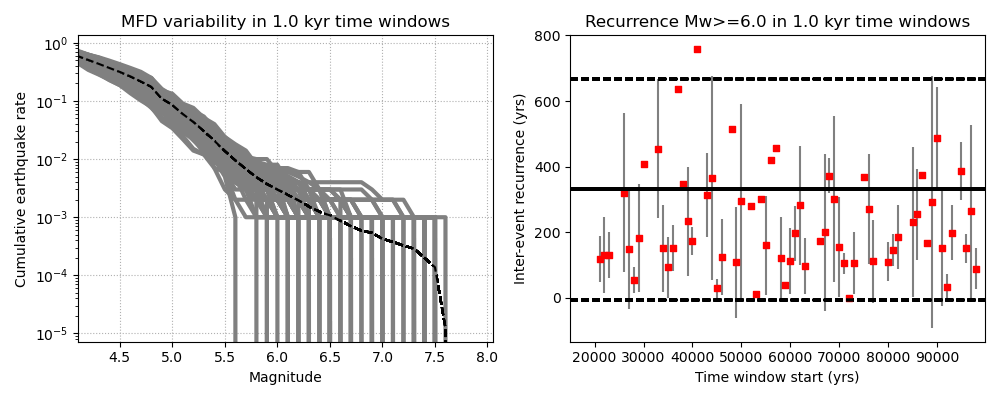

In [14]:
#Analyze time windows and plot range of GR

num_ev_surface_total = []
windows=[]
time_start = np.arange(min(t0_ini), max(t0_ini), time_step)
if len(time_start)>1:
    time_start = time_start[: -1]
time_end = time_start+time_window
cplus=-1
fig, ax = plt.subplots(1,2, figsize=(10,4))
for sl_w in np.arange(0, len(time_start)):
    cplus=cplus+1
    windows.append(str(time_start[int(cplus)]) + " - " + str(time_end[int(cplus)]) + " yrs")
    time_loc = np.where((t0_ini>=time_start[int(cplus)]) & (t0_ini<=time_end[int(cplus)]))[0]
    t0 = np.array(t0_ini)[time_loc]
    M = np.array(M_ini)[time_loc]
    x_tw = np.array(x_ini)[time_loc]
    y_tw = np.array(y_ini)[time_loc]
    z_tw = np.array(z_ini)[time_loc]
    M0 = np.array(M0_ini)[time_loc]
    area = np.array(area_ini)[time_loc]
    num_events = np.array(num_events_ini)[time_loc]
    mag_range = np.arange(0, 8, 0.1)
    hist, bins = np.histogram(M, bins=mag_range)
    
    #Completeness

    M_thres = 6.0
    
    M_recurrence = np.where(M>=M_thres)[0]
    M_rec_total = np.where(M_ini>=M_thres)[0]
    time_recurrence = np.mean(abs(np.diff(t0[M_recurrence])))
    time_rec_total = np.mean(abs(np.diff(t0_ini[M_rec_total])))
    std_rec = np.std(np.diff(t0[M_recurrence]))
    std_rec_total = np.std(np.diff(t0_ini[M_rec_total]))
    
    ax[0].plot(bins[:-1], np.flip(np.cumsum(hist[::-1]))/time_window, color="grey", linewidth=3)
    ax[0].set_yscale('log')
    ax[0].set_xlim(Mc_2, max(M)+0.5)
    ax[0].set_xlabel('Magnitude')
    ax[0].set_ylabel('Cumulative earthquake rate')
    ax[0].set_title("MFD variability in " +str(round(time_window)/1000)+" kyr "+ "time windows")
    ax[0].grid('on', which='major', linestyle=":")
    ax[0].plot(bins1[:-1], np.flip(np.cumsum(hist1[::-1]))/(max(t0_ini)-min(t0_ini)), color="black", linestyle="dashed")
    ax[1].errorbar(time_start[int(cplus)], time_recurrence, std_rec, c="grey",zorder=1)
    ax[1].scatter(time_start[int(cplus)], time_recurrence, marker="s", s=20, c="red", zorder=2)
    ax[1].plot([min(t0_ini)-5000, max(t0_ini)], [time_rec_total, time_rec_total], c="black")
    ax[1].plot([min(t0_ini)-5000, max(t0_ini)], [time_rec_total+std_rec_total, time_rec_total+std_rec_total], c="black", linestyle="dashed")
    ax[1].plot([min(t0_ini)-5000, max(t0_ini)], [time_rec_total-std_rec_total, time_rec_total-std_rec_total], c="black", linestyle="dashed")
    ax[1].set_xlim(min(t0_ini)-5000, max(t0_ini))
    ax[1].set_xlabel("Time window start (yrs)")
    ax[1].set_ylabel("Inter-event recurrence (yrs)")
    ax[1].set_title("Recurrence Mw>="+str(round(M_thres,1))+" in " +str(round(time_window)/1000)+" kyr "+ "time windows")
plt.tight_layout()
plt.show()